In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Step 2: Load the Data
# Load the dataset
url = 'https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv'
df = pd.read_csv(url)


In [3]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe())


   id  identifier  species_id  height  weight  base_experience  order  \
0   1   bulbasaur           1       7      69               64      1   
1   2     ivysaur           2      10     130              142      2   
2   3    venusaur           3      20    1000              263      3   
3   4  charmander           4       6      85               62      5   
4   5  charmeleon           5      11     190              142      6   

   is_default  
0           1  
1           1  
2           1  
3           1  
4           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1092 non-null   int64 
 1   identifier       1092 non-null   object
 2   species_id       1092 non-null   int64 
 3   height           1092 non-null   int64 
 4   weight           1092 non-null   int64 
 5   base_experience  1092 non-null   int64 

In [4]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handling missing values
df.fillna('Unknown', inplace=True)


id                 0
identifier         0
species_id         0
height             0
weight             0
base_experience    0
order              0
is_default         0
dtype: int64


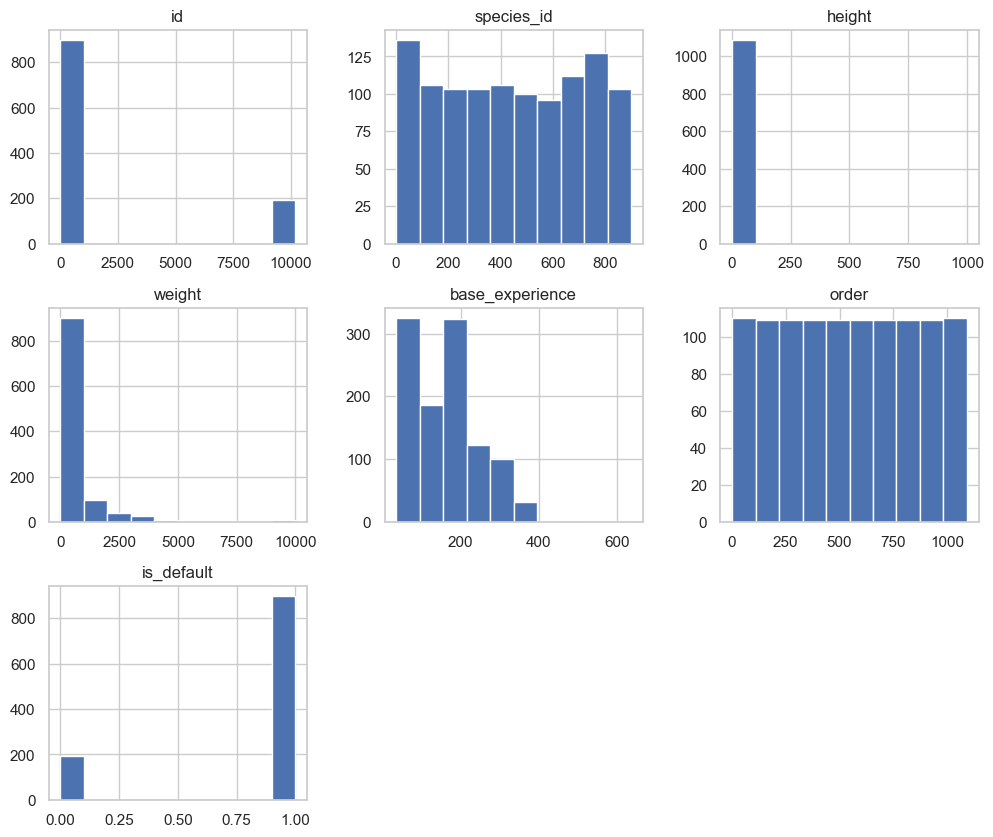

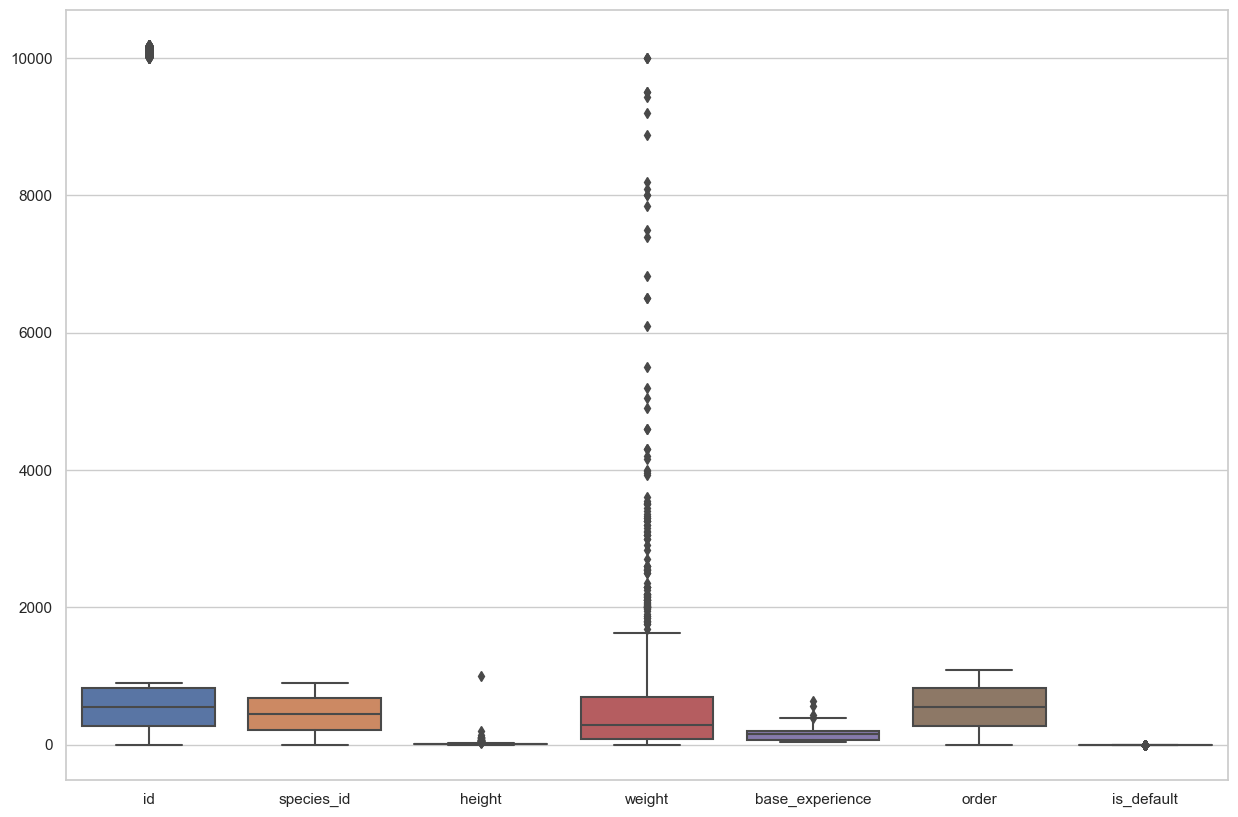

ValueError: could not convert string to float: 'bulbasaur'

<Figure size 1500x1000 with 0 Axes>

In [5]:
# Step 5: Data Visualization
# Histograms for numerical columns
df.hist(figsize=(12, 10))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for relationships between variables
sns.pairplot(df)
plt.show()


In [6]:
# Step 6: Univariate Analysis
# Distribution of HP (Hit Points)
sns.histplot(df['hp'], kde=True)
plt.title('HP Distribution')
plt.show()

# Distribution of Attack
sns.histplot(df['attack'], kde=True)
plt.title('Attack Distribution')
plt.show()

# Distribution of Defense
sns.histplot(df['defense'], kde=True)
plt.title('Defense Distribution')
plt.show()


KeyError: 'hp'

In [7]:
# Step 7: Bivariate Analysis
# Attack vs Defense
sns.scatterplot(x='attack', y='defense', hue='type1', data=df)
plt.title('Attack vs Defense')
plt.show()

# HP vs Speed
sns.scatterplot(x='hp', y='speed', hue='type1', data=df)
plt.title('HP vs Speed')
plt.show()


ValueError: Could not interpret value `attack` for parameter `x`

In [10]:
# Step 8: Multivariate Analysis
# Heatmap for correlations
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for multiple variables
sns.pairplot(df, hue='type1')
plt.show()


ValueError: could not convert string to float: 'bulbasaur'

<Figure size 1500x1000 with 0 Axes>

In [11]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in HP
sns.boxplot(x=df['hp'])
plt.title('Boxplot of HP')
plt.show()

# Removing outliers from HP
Q1 = df['hp'].quantile(0.25)
Q3 = df['hp'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['hp'] < (Q1 - 1.5 * IQR)) | (df['hp'] > (Q3 + 1.5 * IQR)))]

# Box plot to identify outliers in Attack
sns.boxplot(x=df['attack'])
plt.title('Boxplot of Attack')
plt.show()

# Removing outliers from Attack
Q1 = df['attack'].quantile(0.25)
Q3 = df['attack'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['attack'] < (Q1 - 1.5 * IQR)) | (df['attack'] > (Q3 + 1.5 * IQR)))]


KeyError: 'hp'

In [12]:
# Step 10: Feature Engineering
    # Create new feature: Total Stats
df['total_stats'] = df['hp'] + df['attack'] + df['defense'] + df['sp_attack'] + df['sp_defense'] + df['speed']

# Create new feature: Average Stats
df['average_stats'] = df['total_stats'] / 6


KeyError: 'hp'

In [13]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Average stats by primary type
avg_stats_by_type = df.groupby('type1')['average_stats'].mean()
print(f"Average Stats by Primary Type:\n{avg_stats_by_type}")

# Total stats by primary type
total_stats_by_type = df.groupby('type1')['total_stats'].mean()
print(f"Total Stats by Primary Type:\n{total_stats_by_type}")

# Attack vs Defense by primary type
attack_defense_by_type = df.groupby('type1')[['attack', 'defense']].mean()
print(f"Average Attack and Defense by Primary Type:\n{attack_defense_by_type}")


Key Insights:


KeyError: 'type1'

Findings:
1. Primary Type: Different Pokémon types have varying average and total stats. For instance, Dragon-type Pokémon typically have higher average stats compared to Bug-type Pokémon.
2. Attack and Defense: The relationship between attack and defense stats varies significantly between different Pokémon types, with some types like Rock having higher average defense compared to others.
3. Total Stats: Pokémon with higher total stats tend to be of certain types such as Legendary Pokémon, which often have higher overall stats compared to regular Pokémon.